In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Analisis Estadísticos Descriptivos

In [2]:
# importacion de los datos a df_agro
df_agro = pd.read_csv(r'..\\Bases de datos\\EvaluacionAgro01.csv',sep=';')
df_agro.head()

,Dpto,Municipio,desagregacionCultivo,Cultivo,cicloDelCultivo,grupoCultivo,Subgrupo,Anio,Periodo,areaSembradaHa,areaCosechadaHa,produccionTon,rendimientoTonHa,nombreCientificoCultivo,estadoFisicoCultivo
0,Boyacá,Tunja,Fresa,Fresa,Permanente,Frutales,Demas frutales,2019,C,3.0,3.0,30.0,10.0,Fragaria vesca,En fresco
1,Boyacá,Tunja,Avena,Avena,Transitorio,Cereales,Cereales,2019,A,160.0,160.0,480.0,3.0,Avena sativa,En fresco
2,Boyacá,Tunja,Cebada,Cebada,Transitorio,Cereales,Cereales,2019,A,20.0,20.0,60.0,3.0,Hordeum vulgare,En fresco
3,Boyacá,Tunja,Maíz Tradicional,Maíz,Transitorio,Cereales,Cereales,2019,A,180.0,180.0,360.0,2.0,Zea mays,En fresco
4,Boyacá,Tunja,Cebolla De Bulbo,Cebolla De Bulbo,Transitorio,Hortalizas,Hortalizas de raíz,2019,A,120.0,120.0,2400.0,20.0,Allium cepa,En fresco


In [3]:
df_agro['grupoCultivo'] = df_agro['grupoCultivo'].str.replace('Cultivos para Condimentos y Bebidas Medicinales y Aromáticas','Condimentos Bebidas y Aromáticas')
df_agro.shape

(18337, 15)

## Metodo de ONE HOT ENCODER
One Hot Encoding es un proceso utilizado en el aprendizaje automático para convertir variables categóricas en una forma que pueda ser utilizada por algoritmos de predicción. 


**Definición:** One Hot Encoding (también conocido como one-of-K encoding) es una técnica que transforma variables categóricas en una representación binaria.

**Cómo funciona:** Para cada categoría en una variable categórica, se crea una columna binaria (bit) en la matriz de datos. Si un dato pertenece a una categoría específica, se coloca un 1 en la columna correspondiente y 0 en las demás columnas

## Caso de estudio
En nuestro caso de estudio, al analizar las gráficas de barras, seleccionamos los atributos categóricos que consideramos útiles para el modelo. Además, nos aseguramos de que estos atributos tuvieran pocos valores únicos para evitar la alta dimensionalidad en el conjunto de datos resultante.

Estas variables fueron `['Periodo','cicloDelCultivo','grupoCultivo','Dpto']`

In [4]:
df_pruebas = pd.get_dummies(df_agro,columns=['Periodo','cicloDelCultivo','grupoCultivo','Dpto']) 

Ejemplo de la modificación para la creación de la matriz de ceros y unos para el campo 'Periodo' usando la función  `pandas.get_dummies()`

In [5]:
df_agro['Periodo'].head(10)

0    C
1    A
2    A
3    A
4    A
5    A
6    A
7    A
8    A
9    B
Name: Periodo, dtype: object

La matriz resultante tendrá una estructura de ceros y unos, donde cada fila representa una observación y cada columna representa un valor único en el campo ‘Periodo’

In [6]:
df_pruebas[['Periodo_A', 'Periodo_B', 'Periodo_C']].head(10)

,Periodo_A,Periodo_B,Periodo_C
0,0,0,1
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
5,1,0,0
6,1,0,0
7,1,0,0
8,1,0,0
9,0,1,0


Dimensiones de la matriz resultante 

In [7]:
df_pruebas.shape

(18337, 26)

### Correlaciones de nuevas variables
Basados en las nuevas variables numéricas se dispone a visualizar la matriz de correlación con el fin de identificar las variables más apropiadas para nuestro modelo de predicción proyectado.

In [8]:
#Creación de la matriz de corr
tablacorr = df_pruebas.corr()

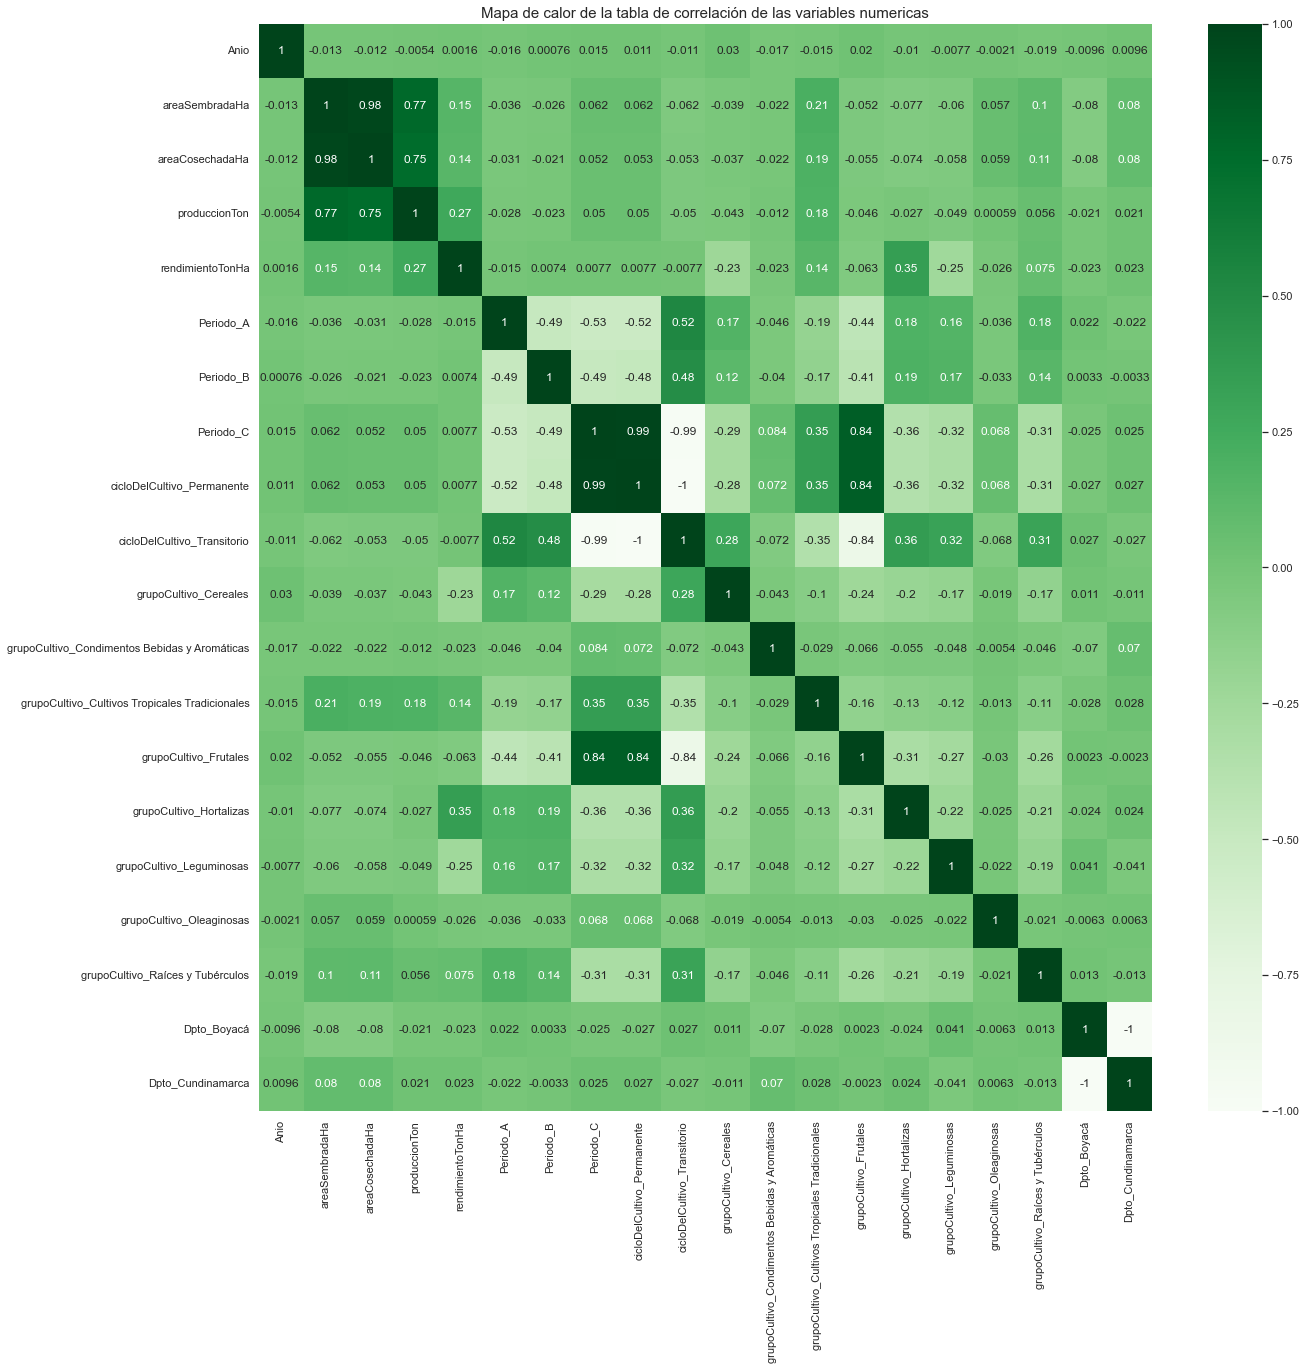

In [25]:
plt.figure(figsize=(20,20))
sns.heatmap(tablacorr,annot=True,cmap='Greens')
plt.title('Mapa de calor de la tabla de correlación de las variables numericas',fontsize=15)
plt.show()

Al realizar un analisis del grafico anterior se llego a que las variables más apropidas dada su fuerte correlación fueron:
```Python
columns=['Dpto_Boyacá',
        'Dpto_Cundinamarca',
        'Anio',
        'grupoCultivo_Condimentos Bebidas y Aromáticas',
        'grupoCultivo_Oleaginosas',
        'nombreCientificoCultivo']
```
 

#### Depuración de variables numéricas con baja correlación


In [10]:
df_pruebas.columns
df_pruebas.drop(columns=['Dpto_Boyacá',
                         'Dpto_Cundinamarca',
                         'Anio',
                         'grupoCultivo_Condimentos Bebidas y Aromáticas',
                         'grupoCultivo_Oleaginosas',
                         'nombreCientificoCultivo'],
                         inplace=True) 

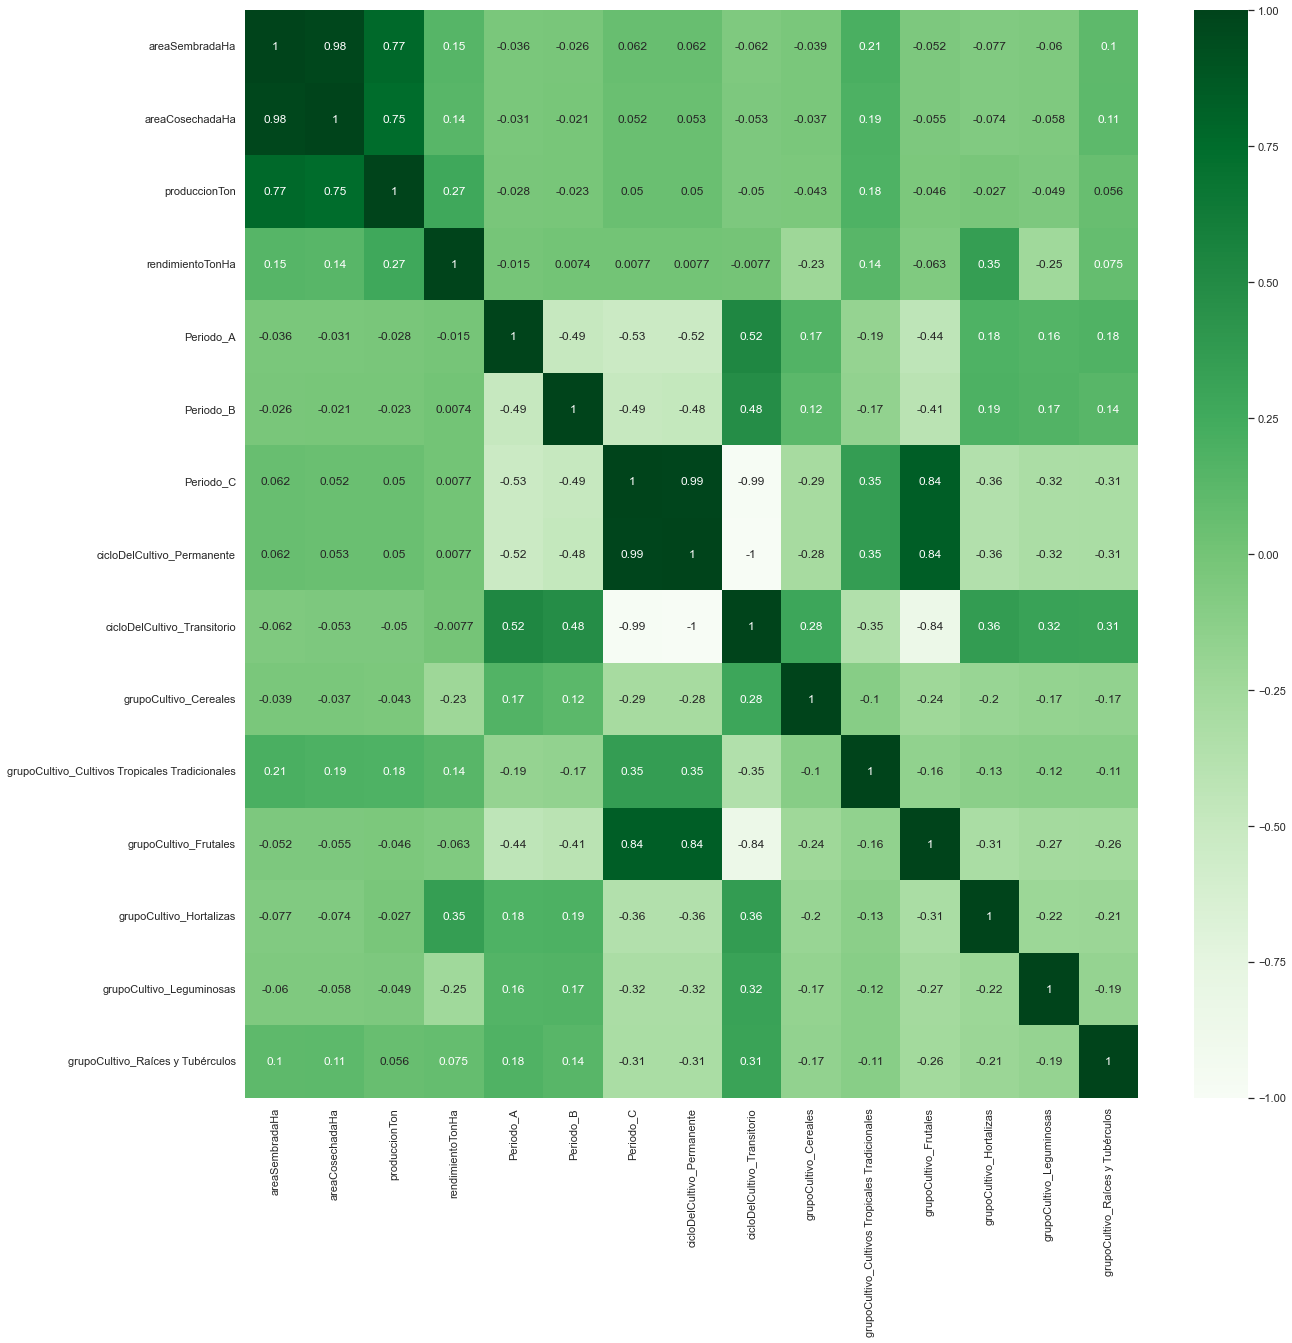

In [11]:
tabla = df_pruebas.corr()
sns.set(rc={'figure.figsize':(20,20)})
sns.heatmap(tabla,annot=True,cmap='Greens')
plt.show()

## Tratamiento de datos Atipicos
Se propone mejorar el modelo realizando un analisis en la variable *areaCosechadaHa*, inicialmente visualizando la distribución de los datos con el fin de identificar los datos atipicos.

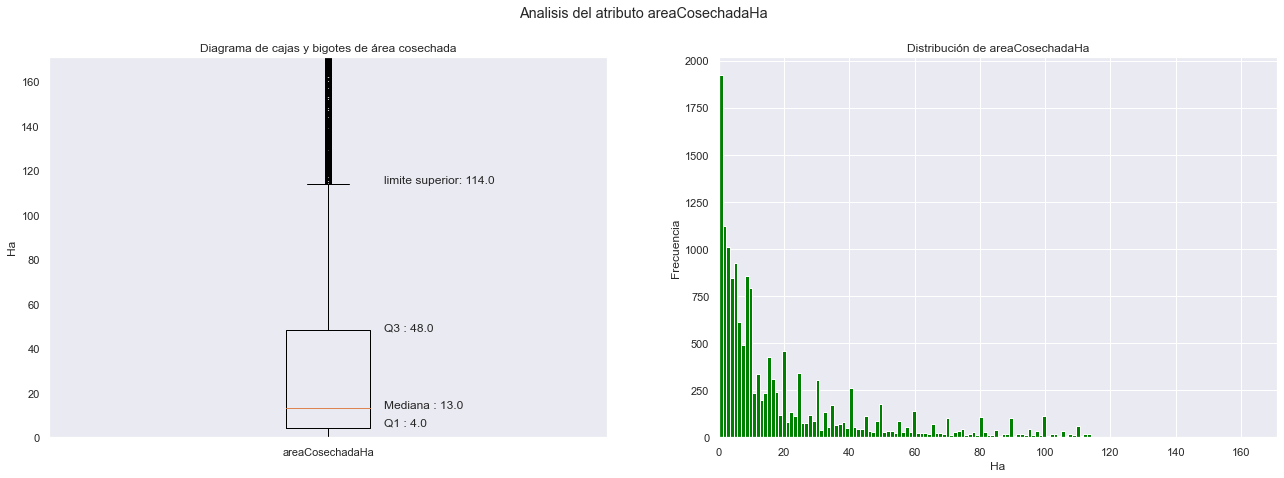

In [12]:
#cambio de formato
estadistica = df_agro['areaCosechadaHa'].describe()

ls = estadistica[6] + 1.5*(estadistica[6] - estadistica[4])

fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(22,7))
plt.suptitle('Analisis del atributo areaCosechadaHa')
ax[0].boxplot(x = df_agro['areaCosechadaHa'],labels=['areaCosechadaHa'])
ax[0].annotate(f'limite superior: {ls}',xy=(1.1,int(ls)))
ax[0].annotate(f'Q1 : {estadistica[4]}',xy=(1.1,5))
ax[0].annotate(f'Mediana : {estadistica[5]}',xy=(1.1,estadistica[5]))
ax[0].annotate(f'Q3 : {estadistica[6]}',xy=(1.1,estadistica[6]))
ax[0].set_ylim(0,ls*1.5)
ax[0].grid()
ax[0].set_title('Diagrama de cajas y bigotes de área cosechada')
ax[0].set_ylabel('Ha')
ax[0].minorticks_on()

df_area = df_agro[df_agro['areaCosechadaHa']<=ls]

ax[1].hist(df_area['areaCosechadaHa'],color='green',edgecolor='white',bins=100)
ax[1].set_xlim(0,ls*1.5)
ax[1].set_title('Distribución de areaCosechadaHa')
ax[1].set_xlabel('Ha')
ax[1].set_ylabel('Frecuencia')
plt.show()

se identifica que los datos atipicos se encuentran fuera de la desviación definida por los bigotes de la grafica de boxplots.

Calculamos el porcentaje de dichos datos atipicos en relación al tamaño de los registros del dataset original.

In [13]:
dim = len(df_area) # dimensiones definidas entre el ls y li de la grafica boxplot.
dim_agro = len(df_agro) # dimensiones del dataset inical
print((dim_agro-dim)/dim_agro*100)

13.873588918579921


Tomando el dataset *df_area* se construye la tabla de correlación para visualizar si el modelo ha mejorado al omitir los datos atipicos

In [14]:
tabla_prueba = df_area.corr()

todo = df_agro[['Anio','areaSembradaHa','areaCosechadaHa','produccionTon','rendimientoTonHa']] # selecion de los datos para realizar una comparación son simple
tabla_agro = todo.corr()

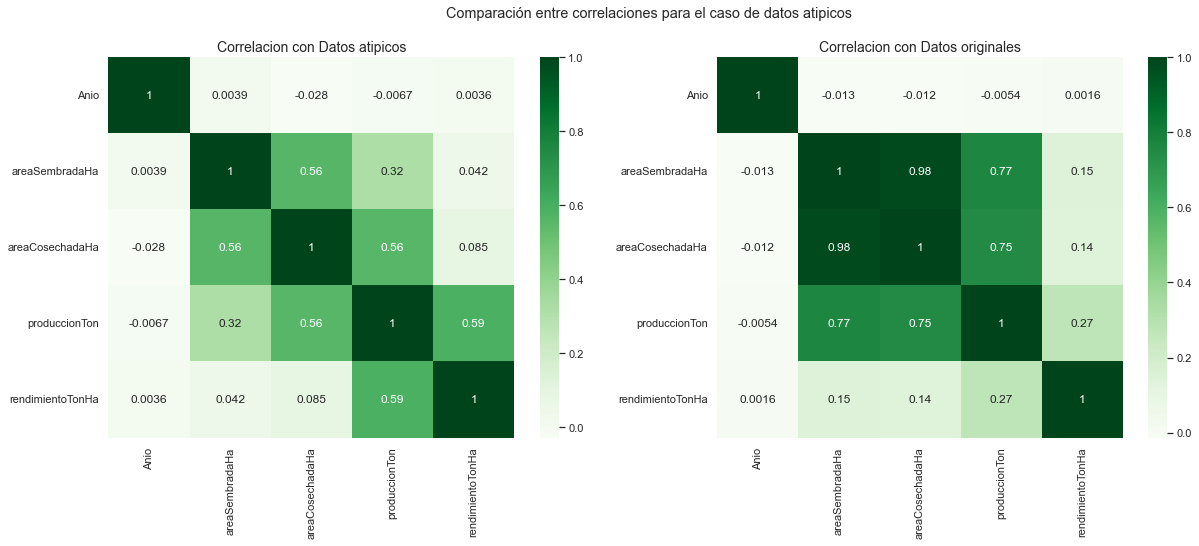

In [15]:
fig, axes = plt.subplots(1, 2,figsize = (20,7))  # Define las dimensiones de los subplots (filas, columnas)
plt.suptitle('Comparación entre correlaciones para el caso de datos atipicos')
sns.heatmap(tabla_prueba,annot=True,cmap='Greens',ax=axes[0])
axes[0].set_title('Correlacion con Datos atipicos',fontsize=14)
axes[1].set_title('Correlacion con Datos originales',fontsize=14)
sns.heatmap(tabla_agro,annot=True,cmap='Greens',ax=axes[1])
plt.show()

Considerando los resultado de las tablas de correlaciónes, el autor nos decribe lo siguiente: ''La correlación no siempre indica causalidad. Incluso si la correlación disminuye, no necesariamente significa que los datos no eran atípicos'', y entendiendo lo que dice el autor consideramos que las varibles pueden ser tratadas con otros métodos para identificación de valores atipicos 

https://es.statisticseasily.com/detecci%C3%B3n-y-tratamiento-de-valores-at%C3%ADpicos/

*Es importante evaluar el contexto y comprender la naturaleza de los datos antes de sacar conclusiones definitivas*

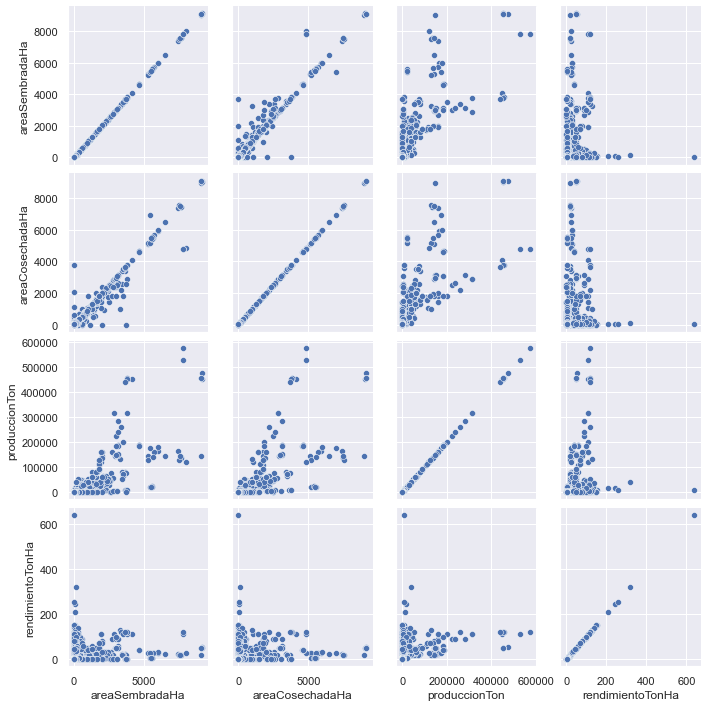

In [16]:
sns.set(rc={'figure.figsize':(7,7)})
sns.pairplot(data=todo[['areaSembradaHa','areaCosechadaHa','produccionTon','rendimientoTonHa']],diag_kind=None)
# plt.title('Grafico de dispersión entre las variables numéricas',fontsize=13)
plt.show()

Qué tipo de cultivo se da por periodo del año ?

Diagrama de despersión según el tipo de cultivo de acuerdo al periodo del año, con el fin de observar un poco la distribución de los datos

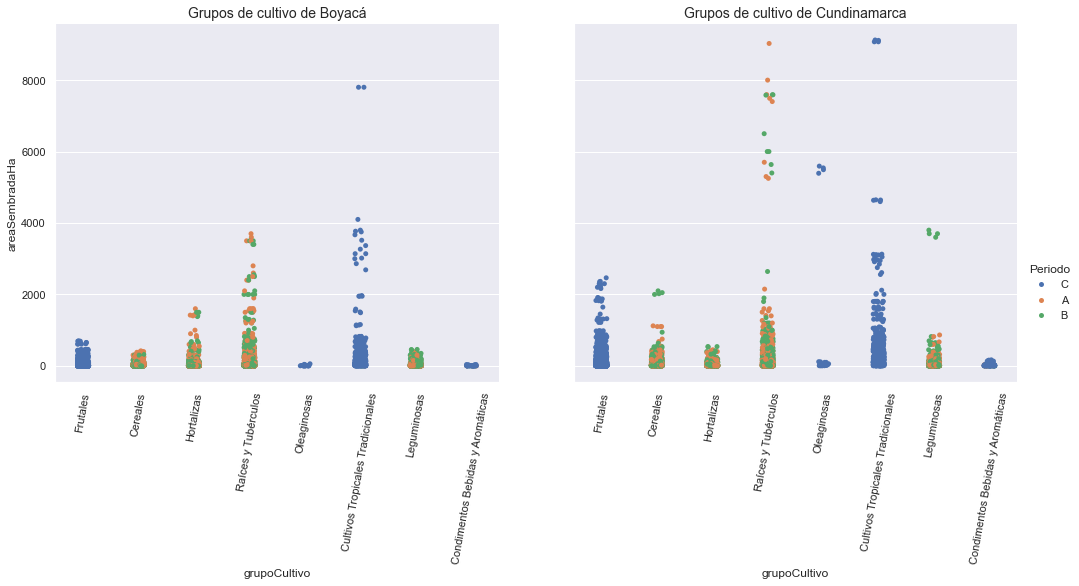

In [17]:
g = sns.catplot(data=df_agro,
            x='grupoCultivo',
            y = 'areaSembradaHa',
            hue='Periodo',
            col='Dpto',
            # kind='bar',
            aspect=1.2,
            errorbar=None,
            height=6)
# plt.suptitle('Grafica de cultivo por area segun el periodo del año')
lista = g.axes.flatten()
lista[0].set_title('Grupos de cultivo de Boyacá',fontsize=14)
lista[1].set_title('Grupos de cultivo de Cundinamarca',fontsize=14)
for ax in g.axes.flatten():
    ax.tick_params(axis='x', rotation=80)
plt.show()

Se pretende elaborar un diagrama de barras cuyo criterio corresponde a la suma del **areaSembrada** en función del **grupo de cultivo** en el periodo del año y por el departamento, con la intensión de observar cuales son los cultivos / AreaSembrada 

In [18]:
tabla =  df_agro.groupby(['Dpto','grupoCultivo','Anio','Periodo']).sum()
tabla.sort_values(['Dpto','areaSembradaHa'],ascending=False,inplace=True)
tablaLimpia = tabla.reset_index()
tablaLimpia

,Dpto,grupoCultivo,Anio,Periodo,areaSembradaHa,areaCosechadaHa,produccionTon,rendimientoTonHa
0,Cundinamarca,Cultivos Tropicales Tradicionales,2019,C,75245.40,68517.80,1964243.97,2666.65
1,Cundinamarca,Cultivos Tropicales Tradicionales,2021,C,74733.82,69178.05,1782647.49,2564.03
2,Cundinamarca,Cultivos Tropicales Tradicionales,2022,C,74572.28,69271.83,1789303.34,3301.57
3,Cundinamarca,Cultivos Tropicales Tradicionales,2020,C,74431.10,69081.10,1950209.12,2573.82
4,Cundinamarca,Frutales,2021,C,55272.72,51351.30,623209.11,6720.68
...,...,...,...,...,...,...,...,...
113,Boyacá,Oleaginosas,2022,C,18.80,15.80,75.55,20.30
114,Boyacá,Condimentos Bebidas y Aromáticas,2019,A,3.00,2.50,4.50,4.00
115,Boyacá,Condimentos Bebidas y Aromáticas,2020,A,2.20,1.70,1.70,2.00
116,Boyacá,Condimentos Bebidas y Aromáticas,2019,B,2.00,2.00,1.50,1.50


### GurpoCultivo / AreaSembradaHa

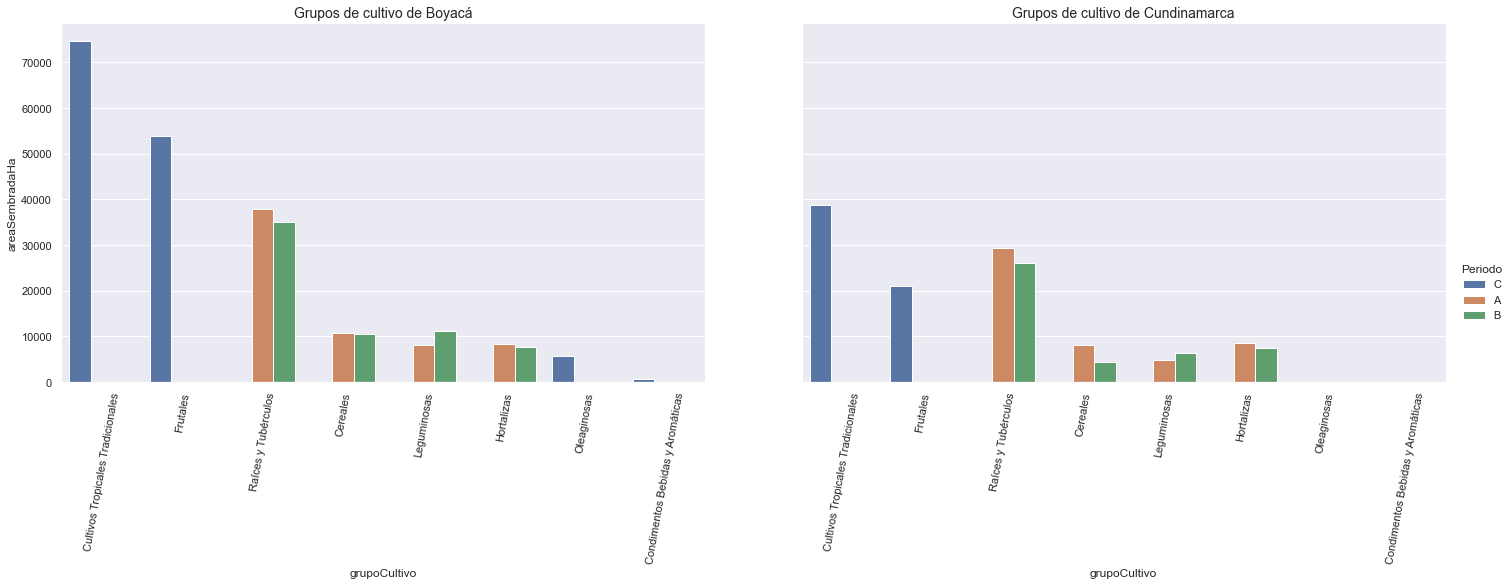

In [19]:
g = sns.catplot(data=tablaLimpia,
            x='grupoCultivo',
            y = 'areaSembradaHa',
            hue='Periodo',
            kind='bar',
            col='Dpto',
            aspect=1.7,
            errorbar=None,
            height=6)
lista = g.axes.flatten()
lista[0].set_title('Grupos de cultivo de Boyacá',fontsize=14)
lista[1].set_title('Grupos de cultivo de Cundinamarca',fontsize=14)
for ax in g.axes.flatten():
    ax.tick_params(axis='x', rotation=80)
plt.show()

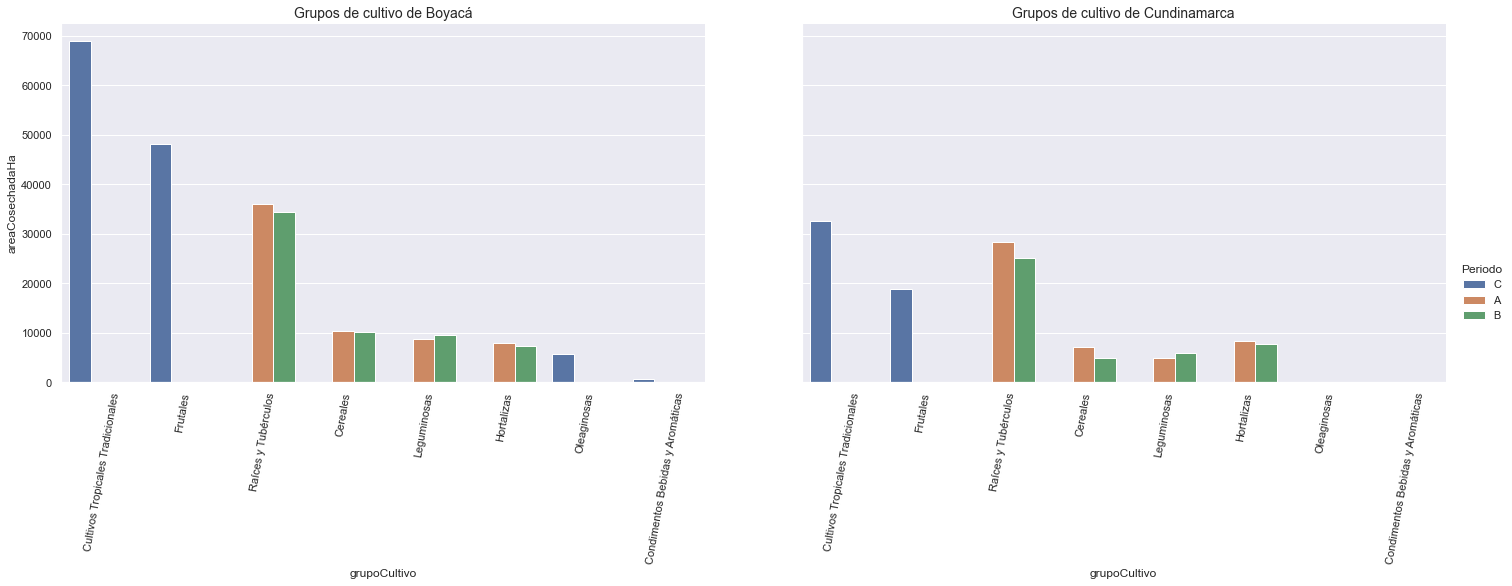

In [20]:
g = sns.catplot(data=tablaLimpia,
            x='grupoCultivo',
            y = 'areaCosechadaHa',
            hue='Periodo',
            kind='bar',
            col='Dpto',
            aspect=1.7,
            errorbar=None,
            height=6)
lista = g.axes.flatten()
lista[0].set_title('Grupos de cultivo de Boyacá',fontsize=14)
lista[1].set_title('Grupos de cultivo de Cundinamarca',fontsize=14)
for ax in g.axes.flatten():
    ax.tick_params(axis='x', rotation=80)
plt.show()

### GrupoCultivo / ProduccionTon

Se pretende elaborar un diagrama de barras cuyo criterio corresponde a la suma del **areaSembrada** en función de la **Producción** en el periodo del año y por el departamento, con la intensión de observar cuales son los cultivos / AreaSembrada 

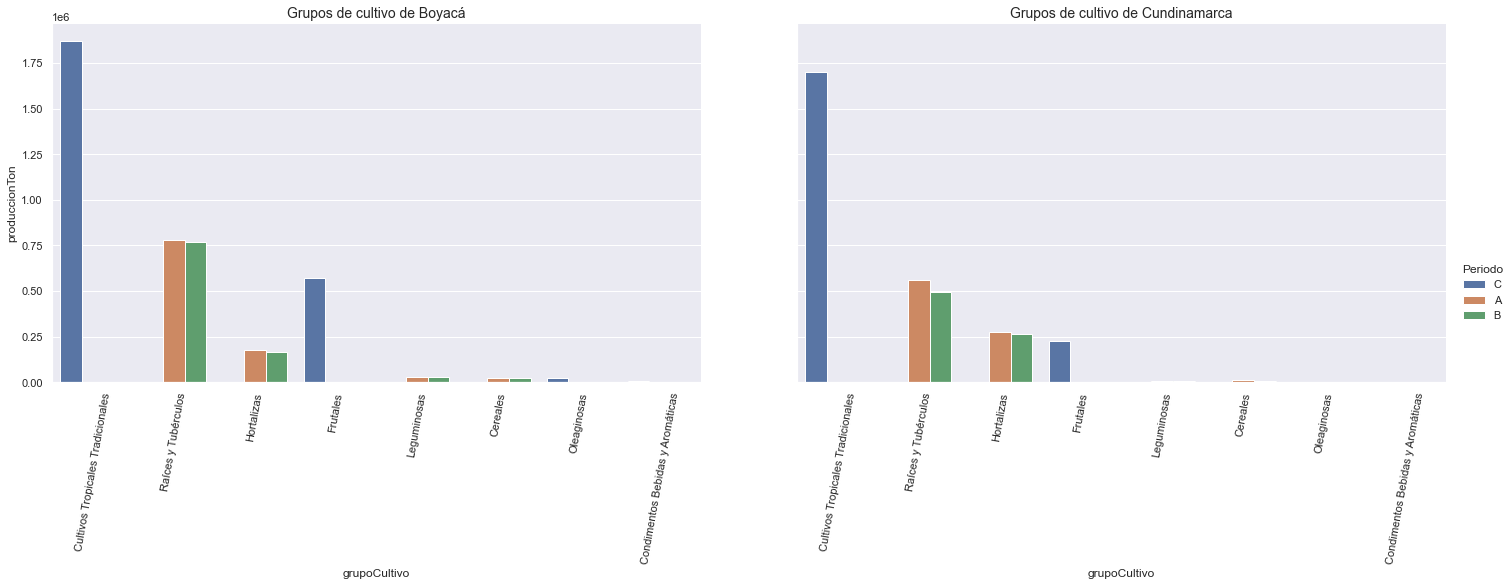

In [21]:
g = sns.catplot(data=tablaLimpia,
            x='grupoCultivo',
            y = 'produccionTon',
            hue='Periodo',
            kind='bar',
            col='Dpto',
            aspect=1.7,
            errorbar=None,
            height=6,
            order=tablaLimpia.groupby('grupoCultivo')['produccionTon'].sum().sort_values(ascending=False).index) # ordena el eje x
lista = g.axes.flatten()
lista[0].set_title('Grupos de cultivo de Boyacá',fontsize=14)
lista[1].set_title('Grupos de cultivo de Cundinamarca',fontsize=14)
for ax in lista:
    ax.tick_params(axis='x', rotation=80)
plt.show()

### Gráfica de Año en función de la producción con filtro de grupo de cultivo y departamento

In [22]:
tablaLimpia2 = df_agro.groupby(['Dpto','Anio','grupoCultivo'])['produccionTon'].sum().reset_index()
tablaLimpia2['produccionMTon'] = tablaLimpia2['produccionTon']/1000000
tablaLimpia2.head(8)

,Dpto,Anio,grupoCultivo,produccionTon,produccionMTon
0,Boyacá,2019,Cereales,19514.86,0.019515
1,Boyacá,2019,Condimentos Bebidas y Aromáticas,463.75,0.000464
2,Boyacá,2019,Cultivos Tropicales Tradicionales,1421757.01,1.421757
3,Boyacá,2019,Frutales,209891.76,0.209892
4,Boyacá,2019,Hortalizas,496215.23,0.496215
5,Boyacá,2019,Leguminosas,17136.95,0.017137
6,Boyacá,2019,Oleaginosas,558.85,0.000559
7,Boyacá,2019,Raíces y Tubérculos,1119270.96,1.119271


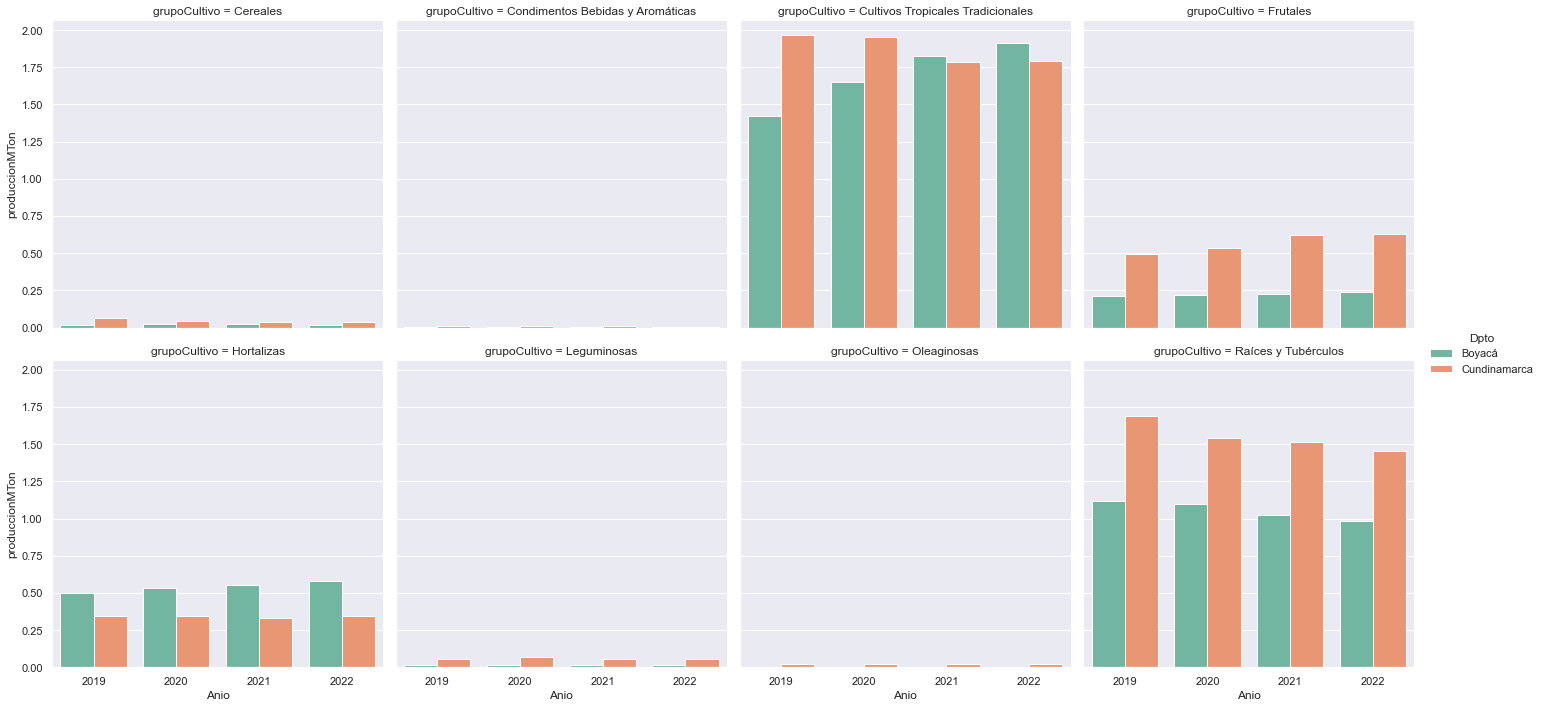

In [23]:
g = sns.catplot(data=tablaLimpia2,
                x='Anio',
                y='produccionMTon',
                col='grupoCultivo',
                kind='bar',
                col_wrap=4,
                hue='Dpto',palette='Set2')
plt.show()

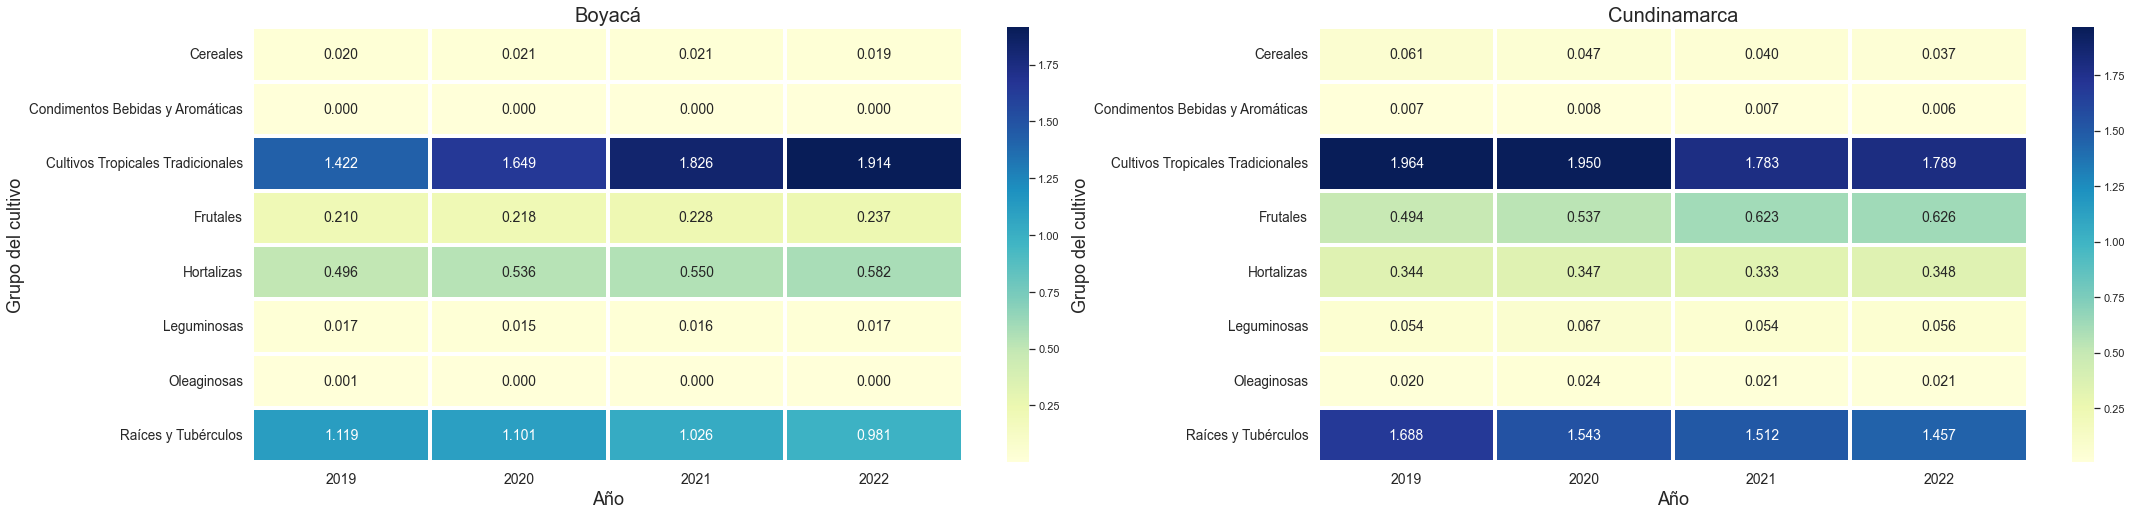

In [70]:
# Grafica de mapa de calor de grupo y año en funcion de la producción
tablaLimpiaBoy = tablaLimpia2[tablaLimpia2['Dpto']=='Boyacá']
tablaLimpiaCun = tablaLimpia2[tablaLimpia2['Dpto']=='Cundinamarca']

#ceaciones de los pivot
pivot_tableBoy = tablaLimpiaBoy.pivot_table(values='produccionMTon', index='grupoCultivo', columns='Anio')
pivot_tableCun = tablaLimpiaCun.pivot_table(values='produccionMTon', index='grupoCultivo', columns='Anio')
fig,ax = plt.subplots(1,2,figsize = (35,8))
sns.heatmap(pivot_tableBoy, cmap="YlGnBu",annot=True,linewidths=3.7,ax=ax[0],fmt='.3f',annot_kws={"size": 14})
sns.heatmap(pivot_tableCun, cmap="YlGnBu",annot=True,linewidths=3.7,ax=ax[1],fmt='.3f',annot_kws={"size": 14})

ax[0].tick_params(axis='x', labelsize=14)
ax[1].tick_params(axis='x', labelsize=14)
ax[0].tick_params(axis='y', labelsize=13.5)
ax[1].tick_params(axis='y', labelsize=13.5)

ax[0].set_title('Boyacá',fontsize=20)
ax[1].set_title('Cundinamarca',fontsize=20)
ax[0].set_xlabel('Año',fontsize=18)
ax[1].set_xlabel('Año',fontsize=18)
ax[0].set_ylabel('Grupo del cultivo',fontsize=18)
ax[1].set_ylabel('Grupo del cultivo',fontsize=18)
plt.show()